# Binary Logistic Regression Demonstration In Python

### Using Bank Loan Data

## Background

A bank possesses demographic and transactional data of its loan customers. If the bank has a model to predict defaulters it can help in loan disbursal decision making. 

- **Sample size** is 700

- **Independent Variables:** Age group, Years at current address, Years at current employer, Debt to Income Ratio, Credit Card Debts, Other Debts. The information on predictors was collected at the time of loan application process.

- **Dependent Variable:** Defaulter (=1 if defaulter ,0 otherwise). The status is observed after loan is disbursed.

## Objective 
To predict whether the customer applying for the loan will be a defaulter or not.



## Data Description

| Column     | Description                                           | Type         |
|-------------|-------------------------------------------------------|--------------|
| SN          | Serial Number                                         | Numeric      |
| AGE         | Age Groups                                            | Categorical  |
| EMPLOY      | Number of years customer working at current employer  | Continuous   |
| ADDRESS     | Number of years customer staying at current address   | Continuous   |
| DEBTINC     | Debt to Income Ratio                                  | Continuous   |
| CREDDEBT    | Credit card debt amount                               | Continuous   |
| OTHDEBT     | Other Debt                                            | Continuous   |
| DEFAULTER   | Whether customer defaulted on loan                    | Binary       |



### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Load Data

In [4]:
bankloan=pd.read_csv('BANK LOAN.csv')
bankloan.head()


,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER
0,1,3,17,12,9.3,11.36,5.01,1
1,2,1,10,6,17.3,1.36,4.00,0
2,3,2,15,14,5.5,0.86,2.17,0
3,4,3,15,14,2.9,2.66,0.82,0
4,5,1,2,0,17.3,1.79,3.06,1


In [5]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SN         700 non-null    int64  
 1   AGE        700 non-null    int64  
 2   EMPLOY     700 non-null    int64  
 3   ADDRESS    700 non-null    int64  
 4   DEBTINC    700 non-null    float64
 5   CREDDEBT   700 non-null    float64
 6   OTHDEBT    700 non-null    float64
 7   DEFAULTER  700 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 43.9 KB


In [6]:
# Change ‘AGE’ variable into categorical

bankloan['AGE']=bankloan['AGE'].astype('category')

bankloan.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SN         700 non-null    int64   
 1   AGE        700 non-null    category
 2   EMPLOY     700 non-null    int64   
 3   ADDRESS    700 non-null    int64   
 4   DEBTINC    700 non-null    float64 
 5   CREDDEBT   700 non-null    float64 
 6   OTHDEBT    700 non-null    float64 
 7   DEFAULTER  700 non-null    int64   
dtypes: category(1), float64(3), int64(4)
memory usage: 39.2 KB


### Build Logistic Regression Model
Initial Model Results

In [7]:
riskmodel = smf.logit(formula = 'DEFAULTER ~ AGE + EMPLOY + ADDRESS + DEBTINC + CREDDEBT + OTHDEBT', data = bankloan).fit()

Optimization terminated successfully.
         Current function value: 0.395291
         Iterations 7


In [8]:
riskmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      692
Method:                           MLE   Df Model:                            7
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.3120
Time:                        19:18:07   Log-Likelihood:                -276.70
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 1.733e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7882      0.264     -2.985      0.003      -1.306      -0.271
AGE[T.2]       0.2520      0.267      0.946      0.344      -0.270       0.774
AGE[T.3]       0.6271      0.361      1.739      0.082      -0.080       1.334
EMPLOY        -0.2617      0.032     -8.211      0.000      -0.324      -0.199
ADDRESS       -0.0996      0.022     -4.459      0.000      -0.143      -0.056
DEBTINC        0.0851      0.022      3.845      0.000       0.042       0.128
CREDDEBT       0.5634      0.089      6.347      0.000       0.389       0.737
OTHDEBT        0.0231      0.057      0.405      0.685      -0.089       0.135
==============================================================================
"""

From the above model, variables with p-value < 0.05 are EMPLOY, ADDRESS, DEBTINC, and CREDDEBT, indicating that they are statistically significant predictors. Hence, we will proceed with these variables for further analysis.

### Check Multicollinearity

In [9]:
X = bankloan[['AGE', 'EMPLOY', 'ADDRESS', 'DEBTINC', 'CREDDEBT', 'OTHDEBT']]
X = sm.add_constant(X)

# Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

    Feature        VIF
0     const  11.051049
1       AGE   1.770665
2    EMPLOY   1.772242
3   ADDRESS   1.443851
4   DEBTINC   1.960974
5  CREDDEBT   1.938673
6   OTHDEBT   2.364779


All VIF values are below 5, indicating no severe multicollinearity among the independent variables.

### Refined Model Results
Re-run model with significant variables

In [10]:
riskmodel = smf.logit(formula = 'DEFAULTER ~  EMPLOY + ADDRESS + DEBTINC + CREDDEBT', data = bankloan).fit()

riskmodel.summary()


Optimization terminated successfully.
         Current function value: 0.397671
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              DEFAULTER   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Wed, 19 Nov 2025   Pseudo R-squ.:                  0.3079
Time:                        19:18:08   Log-Likelihood:                -278.37
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.114e-52
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7911      0.252     -3.145      0.002      -1.284      -0.298
EMPLOY        -0.2426      0.028     -8.646      0.000      -0.298      -0.188
ADDRESS       -0.0812      0.020     -4.144      0.000      -0.120      -0.043
DEBTINC        0.0883      0.019      4.760      0.000       0.052       0.125
CREDDEBT       0.5729      0.087      6.566      0.000       0.402       0.744
==============================================================================
"""

### Predict Probabilities

In [11]:
bankloan['Pred'] = riskmodel.predict()
bankloan.head()

,SN,AGE,EMPLOY,ADDRESS,DEBTINC,CREDDEBT,OTHDEBT,DEFAULTER,Pred
0,1,3,17,12,9.3,11.36,5.01,1,0.808347
1,2,1,10,6,17.3,1.36,4.00,0,0.198115
2,3,2,15,14,5.5,0.86,2.17,0,0.010063
3,4,3,15,14,2.9,2.66,0.82,0,0.022160
4,5,1,2,0,17.3,1.79,3.06,1,0.781808


### Visualise Performance : ROC Curve

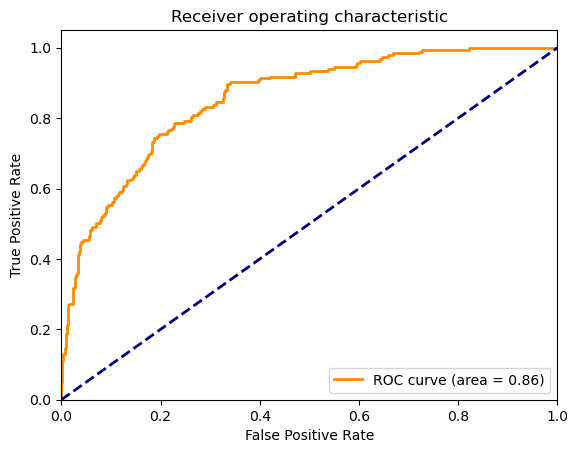

In [12]:
from sklearn.metrics import roc_curve, auc
bankloan=bankloan.assign(pred=riskmodel.predict())
fpr, tpr, thresholds = roc_curve(bankloan['DEFAULTER'], bankloan['Pred'])


ruc_auc = auc(fpr,tpr)

import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % ruc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0]);plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic');plt.legend(loc="lower right")
plt.show()


In [13]:
print("Area under the ROC curve : %f" % ruc_auc)


Area under the ROC curve : 0.855619


### Get Confusion Matrix & Classificaton Report

In [14]:
bankloan['Pred_class'] = np.where(bankloan['Pred']>=0.5,1,0) #Default Threshold is 0.5

cm1 = confusion_matrix(bankloan['DEFAULTER'],bankloan['Pred_class'])
cm1

array([[478,  39],
       [ 91,  92]])

In [15]:
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity.round(3))

specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity.round(3))


Sensitivity :  0.503
Specificity :  0.925


### NOTE:


> By default, the classification threshold is set at **0.5**. However, the **optimal threshold** is the point where **sensitivity** and **specificity** are balanced, ensuring better model performance. In our example, sensitivity is **0.50** and specificity is **0.92**, indicating that the default threshold is not optimum. Therefore, one can experiment with different thresholds or use an optimal threshold function. In our case, the **optimal threshold is 0.3**, which provides a better trade-off between sensitivity and specificity.


In [16]:
print(classification_report(bankloan['DEFAULTER'],bankloan['Pred_class']))


              precision    recall  f1-score   support

           0       0.84      0.92      0.88       517
           1       0.70      0.50      0.59       183

    accuracy                           0.81       700
   macro avg       0.77      0.71      0.73       700
weighted avg       0.80      0.81      0.80       700



Recall is 50% and Precision is 70%

### Evaluate Model Performance Using Optimal Threshold

In [17]:
bankloan['Pred_optimal_class'] = np.where(bankloan['Pred']>=0.3,1,0) #Changing it to optimal threshold 0.3

cm1 = confusion_matrix(bankloan['DEFAULTER'],bankloan['Pred_optimal_class'])
cm1

array([[415, 102],
       [ 45, 138]])

In [18]:
sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Sensitivity : ', sensitivity.round(3))

specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Specificity : ', specificity.round(3))


Sensitivity :  0.754
Specificity :  0.803


In [19]:
print(classification_report(bankloan['DEFAULTER'],bankloan['Pred_optimal_class']))


              precision    recall  f1-score   support

           0       0.90      0.80      0.85       517
           1       0.57      0.75      0.65       183

    accuracy                           0.79       700
   macro avg       0.74      0.78      0.75       700
weighted avg       0.82      0.79      0.80       700

